In [1]:
import os
import glob
import json
import numpy as np
import xarray as xr
import geopandas as gpd

import cartopy.crs as ccrs

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors

import sys
sys.path.append(os.path.abspath(".."))
from function import ART_downscale as ART_down
from function import ART_statistic as ART_stat

## Compare results for BETA

### BETA function: space_time_scales_agregations

### BETA function: space_time_scales_agregations_v2

In [2]:
product, time_reso = 'ERA5', '3h'
# product, time_reso = 'CMORPH', '3h'
# product, time_reso = 'IMERG', '3h'
# product, time_reso = 'MSWEP', '3h'
# product, time_reso = 'GSMaP', '3h'

# product, time_reso = 'IMERG', '1dy'

# product, time_reso = 'PERSIANN', '1dy'
# product, time_reso = 'SM2RAIN', '1dy'
# product, time_reso = 'CHIRPS', '1dy'

In [3]:
dir_base = os.path.join('/','media','arturo','Arturo','Data','Italy','Satellite')

In [4]:
veneto_dir = os.path.join('/','media','arturo','Arturo','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    VENETO = gpd.read_file(os.path.join(veneto_dir,'Veneto.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

In [5]:
if product == 'SM2RAIN':
    dir_in = os.path.join(dir_base,'1_BETA',f'VENETO_BETA_{product}_{time_reso}_2007_2012_npix_5.nc')
else:
    dir_in = os.path.join(dir_base,'1_BETA',f'VENETO_BETA_{product}_{time_reso}_2002_2012_npix_5.nc')
DATA = xr.open_dataset(dir_in)
lat = DATA.lat.values
lon = DATA.lon.values
lon2d, lat2d = np.meshgrid(lon,lat)

BETA1 = DATA.BETA.values

In [9]:
if product == 'SM2RAIN':
    dir_in = os.path.join(dir_base,'1_BETA',f'VENETO_BETA_{product}_{time_reso}_2007_2012_npix_5_v2.nc')
else:
    dir_in = os.path.join(dir_base,'1_BETA',f'VENETO_BETA_{product}_{time_reso}_2002_2012_npix_5_v2.nc')
DATA = xr.open_dataset(dir_in)
lat = DATA.lat.values
lon = DATA.lon.values
lon2d, lat2d = np.meshgrid(lon,lat)

BETA2 = DATA.BETA.values

In [10]:
if product == 'SM2RAIN':
    BETA1[BETA1>2] = np.nan
    BETA1[BETA1<0] = np.nan
    BETA2[BETA2>2] = np.nan
    BETA2[BETA2<0] = np.nan
elif product == 'CHIRPS':
    BETA1[BETA1<0] = np.nan
    BETA1[BETA1>50] = np.nan

Text(0.0, 1.0, '(c) NEW - CONTROL')

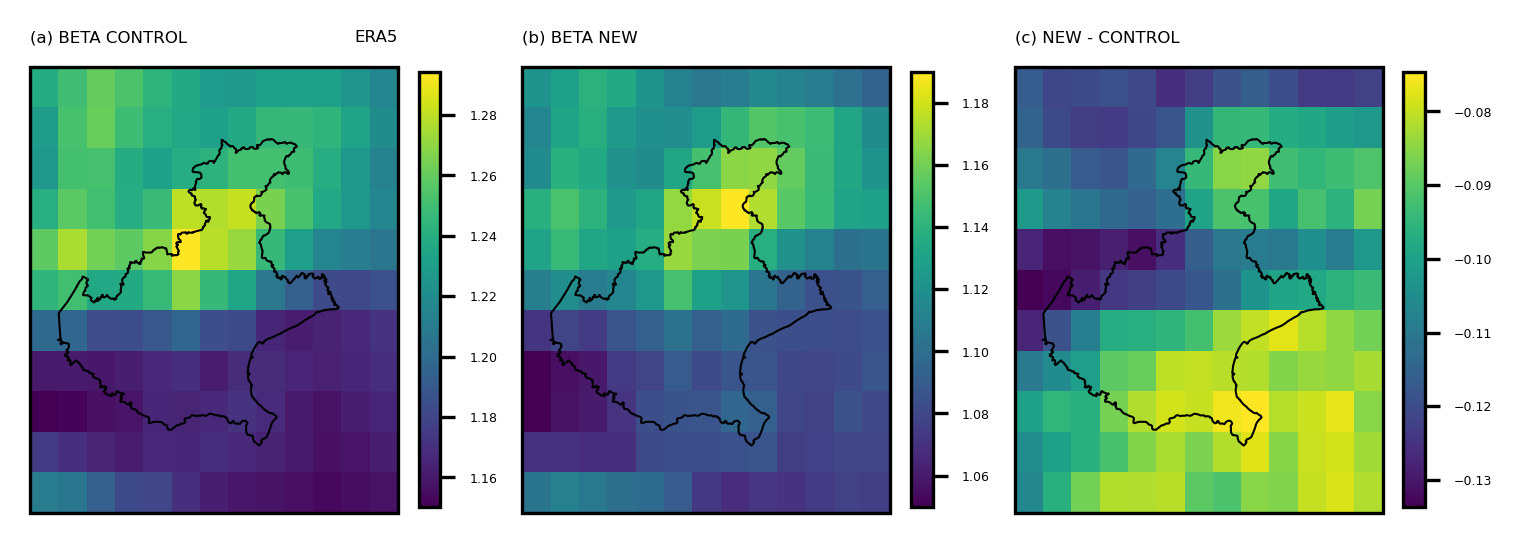

In [11]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(6,3),dpi=300)
gs = gridspec.GridSpec(1,3)

ax1 = plt.subplot(gs[0, 0], projection=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
a1 = ax1.pcolormesh(lon2d, lat2d, BETA1)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=3)
ax1.set_title('(a) BETA CONTROL', fontsize=4, loc='left')
ax1.set_title(product, fontsize=4, loc='right')

ax1 = plt.subplot(gs[0, 1], projection=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
a1 = ax1.pcolormesh(lon2d, lat2d, BETA2)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=3)
ax1.set_title('(b) BETA NEW', fontsize=4, loc='left')

ax1 = plt.subplot(gs[0, 2], projection=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
a1 = ax1.pcolormesh(lon2d, lat2d, BETA2 - BETA1)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=3)
ax1.set_title('(c) NEW - CONTROL', fontsize=4, loc='left')